# Contrastive Learning: A Simple Overview

<hr>

## 1 - Traditional Learning Methods


### 1.1 - Supervised Learning: Learning with Labels

- **Label-Dependent:** Uses a large amount of labeled data (each piece of data is tagged with the correct answer).
- **Example:** Teaching a machine to recognize animals in photos by showing it pictures of animals with labels (like "cat" or "dog").
- A system is given an input $(x)$ and a label $(y)$.

<br>
<div style="text-align:center">
    <img src="media/pig1.png" width=400><br>
    <center><caption><font color="purple"><b><u>Figure 1:</u></b> Supervised Learning: Input on the left, label on the right</font></caption></center>
</div>


### 1.2 - Unsupervised Learning: Learning Without Labels

- **Exploring Data:** Tries to understand and organize data without any labels or answers given.
- **Example:** Giving a machine a bunch of animal photos without telling it anything about them, and it tries to group similar ones together.
- A system is given inputs $(X)$ without explicit labels.

<br>
<div style="text-align:center">
    <img src="media/animation1.gif" width=700><br>
    <center><caption><font color="purple"><b><u>Figure 2:</u></b> Similarity-based Clustering</font></caption></center>
</div>

### 1.3 - Problem with Traditional Learning

- Supervised learning requires a lot of labeled data, which is time-consuming and expensive to produce. <font color="red">80% of the time spent in a supervised learning ML project is invested in acquiring and cleaning the data for model training.</font>
- Unsupervised learning often struggles to find meaningful patterns in complex data.

The recent focus of Deep Learning research has been on reducing the requirement for supervision in model training. To this end, several methodologies have been proposed, like Semi-Supervised Learning, Unsupervised Learning, and Self-Supervised Learning.
 
1. In **Semi-Supervised Learning,** a small amount of labeled data is used along with a large amount of unlabeled data to train a deep model. 

2. In **Unsupervised Learning,** the model tries to make sense of the unstructured data without any data labels.

3. In **Self-Supervised Learning (SSL),** unstructured data is provided as input to the model like in unsupervised learning. However, the model annotates the data on its own, and labels that have been predicted with high confidence are used as ground truths in future iterations of the model training. This keeps improving the model weights to make better predictions.

One of the oldest and most popular techniques employed in SSL is **Contrastive Learning,** which uses "positive" and "negative" samples to guide the Deep Learning model. Contrastive Learning has since evolved further and is now being used in fully supervised and semi-supervised settings as well giving a boost in performance to existing state-of-the-art.

## 2 - Transitioning to Contrastive Learning

Contrastive Learning bridges the gap between the intensive label dependency of supervised learning and the often broad, unspecific insights of unsupervised learning. 

<br><center><font color="purple"><b>Contrastive Learning (CL) is a technique used to learn the general features of a "dataset without labels" by teaching the model which data points are similar or dissimilar.</b></font></center>


### 2.1 - Why Contrastive Learning is Important

- **Efficiency:** Requires fewer labels, reducing the time and cost of data preparation.
- **Best of Both Worlds:** Combines the precision of supervised learning with the exploratory nature of unsupervised learning.
- **Natural Learning Process:** Mimics how humans learn - by comparing and contrasting things rather than memorizing labels.

> <font color='blue'><i>Imagine a newborn baby that is trying to make sense of the world. At home, there are two cats and one dog. Even though no one tells the baby that they are two 'cats' and one 'dog', the baby may realize that the two cats look similar compared to the dog. By merely recognizing the similarities and differences between furry cats and non-furry dogs (or pointy vs droopy ears), our brains can learn the high-level features of the objects in the world.</i></font>

Consider this puzzle:

<br>
<div style="text-align:center">
    <img src="media/contrastive-find-a-pair.png" width=500><br>
    <center><caption><font color="purple"><b><u>Figure 3:</u></b> Find the correct pair</font></caption></center>
</div>

The way a child would solve it is by looking at the picture of the animal on the left side, know its a cat, then search for a cat on the right side.

<br>
<div style="text-align:center">
    <img src="media/animation8.gif" width=500><br>
    <center><caption><font color="purple"><b><u>Figure 4:</u></b> Finding the correct pair</font></caption></center>
</div>

**Insight:** Such exercises were prepared for the child to be able to recognize an object and contrast that to other objects. Can we similarly teach machines? 

Yes, we can through **Contrastive Learning.** Contrastive learning allows a model to look at pairs of images and classify them as either "similar" or "dissimilar" before even having a task such as classification. In essence, we can train the model to learn a lot about the data without any annotations or labels, hence the term, **self-supervised learning**.

### 2.2 - Contrastive Learning as Self-Supervised Learning

In **self-supervised learning,** the system is only given $(x)$. Instead of a $(y)$, the system "learns to predict part of its input from other parts of its input".

<br>
<div style="text-align:center">
    <img src="media/pig2.png" width=400><br>
    <center><caption><font color="purple"><b><u>Figure 5:</u></b> In self-supervised learning, the input is used both as the source and target</font></caption></center>
</div>

In fact, this formulation is so generic that you can get creative about ways of "splitting" up the input. These strategies are called `pretext tasks` and researchers have tried all sorts of approaches. Here are three examples: 

1. Predicting relative locations of two patches
2. Solving a jigsaw puzzle
3. Colorizing an image

<br>
<div style="text-align:center">
    <img src="media/pretext_tasks.png" width=750><br>
    <center><caption><font color="purple"><b><u>Figure 6:</u></b> Examples of pretext tasks</font></caption></center>
</div>

Although the approaches above are full of creativity, they don't actually work well in practice. However, a more recent stream of approaches that uses **contrastive learning** has actually started to dramatically close the gap between supervised learning on ImageNet.

## 3 - CL Terminology

The fundamental idea is to group similar examples together! Given images of cats, dogs, and zebras, we want the model to learn to group cats with cats and not with zebras.

### 3.1 - Similar and Dissimilar Images

We need pairs of images that are similar and images that are different for training a CL model.

<br>
<div style="text-align:center"><br>
    <center><img src="media/contrastive-need-one.png" width=600></center>
</div>


**Insight:** The supervised school of thought would require a human to manually annotate such pairs. To automate this, we could leverage self-supervised learning. But how do we formulate this?


<br>
<div style="text-align:center"><br>
    <center><img src="media/contrastive-supervised-approach.png" width=600></center>
</div>


The basic contrastive learning framework consists 3 key ingredients:

- Anchor Image
- Positive Image
- Negative Image

Select a data sample called the **anchor**. Now, select a data point belonging to the same distribution as the anchor, called the **positive** sample, and another data point belonging to a different distribution called the **negative** sample.

<div style="text-align:center">
    <img src="media/animation2.gif" width=700><br>
    <center><caption><font color="purple"><b><u>Figure 7:</u></b> A Positive and Negative Pair</font></caption></center>
</div>


### 3.2 - CL Task

The CL model tries to minimize the distance between the anchor and positive samples, i.e., the samples belonging to the same distribution, in the latent space, and at the same time maximize the distance between the anchor and the negative samples.


### 3.3 - Ability to Represent an Image

We need some mechanism to get representations that allow the machine to understand an image.

<br>
<div style="text-align:center"><br>
    <center><img src="media/image-representation.png" width=300></center>
</div>


### 3.4 - Ability to Quantify if Two Images are Similar

We need some mechanism to compute the similarity of two images.

<br>
<div style="text-align:center"><br>
    <center><img src="media/image-similarity.png" width=300></center>
</div>

<center><font color="red">How do we generate the positive and negative pairs of images for the model? We can use an existing CL framework such as SimCLR.</font></center>

## 4 - SimCLR Framework

**[SimCLRv2](https://arxiv.org/pdf/2002.05709.pdf)** (Simple Framework for Contrastive Learning of Visual Representations) is one of the recent state-of-the-art frameworks by the Google Brain Team for modeling the above problem in a self-supervised manner. It blends the concept of Contrastive Learning with a few novel ideas to learn visual representations without human supervision.

**Basic Idea:** An image is taken and random transformations are applied to it to get a pair of two augmented images 
$x_i$ and $x_j$. Each image in that pair is passed through an encoder to get representations. Then a non-linear fully connected layer is applied to get representations $z$ in the latent space. The task is to maximize the similarity between these two representations $z_i$ and $z_j$ for the same image.
 
<br>
<div style="text-align:center">
    <img src="media/simclr-general-architecture.png" width=800><br>
    <center><caption><font color="purple"><b><u>Figure 8:</u></b> SimCLR Framework</font></caption></center>
</div>

The entire process can be described concisely in three basic steps:

1. Data augmentation
2. Encoding
3. Loss minimization

### 4.1 - Data Augmentation Methods

A data augmentation pipeline $A(x)$ applies a sequence of stochastic transformations to the same input.

<br>
<div style="text-align:center">
    <center><img src="media/animation3.gif" width=800></center>
</div>

#### 4.1.1 - CPC pipeline

CPC introduced a pipeline that applies transforms like **color jitter, random greyscale, random flip,** etc ... but it also introduced a special transform that splits an image into overlaying sub patches.

<br>
<div style="text-align:center">
    <center><img src="media/animation4.gif" width=200></center>
</div>

Using this pipeline, CPC can generate many sets of positive and negative samples. In practice, this process is applied to a batch of examples where we can use the rest of the examples in the batch as the negative samples.

<br>
<div style="text-align:center">
    <center><img src="media/animation5.gif" width=700></center>
</div>


#### 4.1.2 - AMDIM pipeline

AMDIM takes a slightly different approach. After it performs the standard transforms (jitter, flip, etc ...), it generates two versions of an image by applying the data augmentation pipeline twice to the same image in a batch.

<br>
<div style="text-align:center">
    <center><img src="media/animation6.gif" width=800></center>
</div>

### 4.2 - Encoding

Each augmented image in a pair is passed through an encoder to get image representations. The encoder used is generic and replaceable with other architectures. The two encoders shown below have shared weights and we get vectors $h_i$ and $h_j$.

<br>
<div style="text-align:center">
    <center><img src="media/simclr-encoder-part.png" width=800></center>
</div>

The authors of SimCLR used ResNet-50, which we can think of as simply a function, $h = f(x)$, where $x$ is one of our augmented images, to encode both of our images as vector representations.

<br>
<div style="text-align:center">
    <img src="media/resnet.png" width=800><br>
    <center><caption><font color="purple"><b><u>Figure 9:</u></b> ResNet architecture</font></caption></center>
</div>


### 4.3 - Project Head

The representations $h_i$ and $h_j$ of the two augmented images are then passed through a series of non-linear **Dense $\rightarrow$ Relu $\rightarrow$ Dense** layers to apply non-linear transformation and project it into a representation $z_i$ and $z_j$.

<br>
<div style="text-align:center">
    <center><img src="media/simclr-projection-head-component.png" width=800></center>
</div>

The `projection head`, $z = g(h)$ transforms the data into a latent space. This extra step is empirically shown to improve performance. By compressing our images into a latent space representation, the model is able to learn the high-level features of the images.

<div style="text-align:center">
    <img src="media/animation7.gif" width=800><br>
    <center><caption><font color="purple"><b><u>Figure 10:</u></b> Latent Space Representation</font></caption></center>
</div>


#### Intuition

<font color="blue"><i>ResNet gives you a very detailed vector for each image of a dog, kind of like a hyper-detailed list of characteristics for every dog. This list includes all sorts of information, from the color of their fur to the background of the picture. It's thorough, but it's a lot of data for a model to sift through, and it might focus on the wrong details - like the pattern of the carpet behind the dog instead of the dog itself.</i></font>

<font color="blue"><i>What you want is for the model to understand what makes a dog look like a dog, regardless of the carpet pattern or whether the photo was taken during the day or at night. You want it to grasp the concept of 'dog-ness' - the floppy ears, the snout, the paws.</i></font>

<font color="blue"><i>Here's where the projection head comes into play. You pass the detailed ResNet vector through the projection head, which is like telling a story. Instead of reciting every fact about the dog and its environment, the projection head simplifies the story, focusing on the key elements that are actually about the dog. This process transforms the detailed ResNet vector into a more abstract version in the latent space.</i></font>

<font color="blue"><i>In this latent space, the essence of 'dog-ness' is captured in a less detailed but more meaningful way. It's not distracted by whether there's a bone in the picture or if the dog has a collar. It's more about the shape of the dog, the texture of its fur, and the posture it's in.</i></font>

<font color="blue"><i>When your model is trained with these abstracted 'stories' of dogs, it becomes better at recognizing dogs in new photos, even if they're in a completely different setting or have a different fur pattern than what it has seen before. This helps the model generalize better, understanding the concept of a dog, much like how after reading several stories about dogs, a child can recognize new dogs they've never seen before.</i></font>

### 4.3 - Loss Minimization

Now that we have two vectors, we need a way to quantify the similarity between them. Since we are comparing vectors, a natural choice is `cosine similarity`, which is based on the angle between the two vectors in space.

<br>
<div style="text-align:center">
    <center><img src="media/simclr-projection-vectors.png" width=350></center>
</div>


#### 4.3.1 - Calculation of Cosine Similarity

For two augmented images $x_i$ and $x_j$, the cosine similarity is calculated on its projected representations $z_i$ and $z_j$:

<br>
<div style="text-align:center">
    <center><img src="media/simclr-cosine-similarity.png" width=500></center>
</div>

Mathematically,

$$s_{i, j} = \frac{z_i^T z_j}{\left( \tau ||z_i|| ||z_j|| \right)}$$

where
- $\tau$ is the adjustable temperature parameter. It can scale the inputs and widen the range $[-1, 1]$ of cosine similarity
- $||z_i||$ is the norm of the vector


#### 4.3.2 - Loss Calculation

SimCLR uses a contrastive loss called **"NT-Xent loss" (Normalized Temperature-Scaled Cross-Entropy Loss).**

First, the augmented pairs in the batch are taken one by one.

<br>
<div style="text-align:center">
    <center><img src="media/simclr-augmented-pairs-batch.png" width=600></center>
</div>

Next, we apply the softmax function to get the probability of these two images being similar.

<br>
<div style="text-align:center">
    <center><img src="media/simclr-softmax-calculation.png" width=600></center>
</div>

<br>
<div style="text-align:center">
    <img src="media/simclr-softmax-interpretation.png" width=400>
</div>


Then, the loss is calculated for a pair by taking the negative of the log of the above calculation. This formulation is the **Noise Contrastive Estimation(NCE) Loss.**

$$l(i, j) = -\log \left( \frac{e^{s_{i,j}}}{\sum_{k=1}^{2N} \mathbf{1}_{\{k \neq j\}} e^{s_{i,k}}} \right)$$


<br>
<div style="text-align:center">
    <center><img src="media/simclr-softmax-loss.png" width=600></center>
</div>

We calculate the loss for the same pair a second time as well where the positions of the images are interchanged.


<br>
<div style="text-align:center">
    <center><img src="media/simclr-softmax-loss-inverted.png" width=600></center>
</div>


Finally, we compute loss over all the pairs in the batch of size $N$ and take an average.

$$L = \frac{1}{2N} \sum_{k=1}^N [l(2k-1, 2k) + l(2k, 2k-1)]$$

Based on the loss, the encoder and projection head representations improves over time and the representations obtained place similar images closer in the space.

## 5 - Training Loop

The SimCLR training logic can be visualized as:

<div style="text-align:center">
    <img src="media/training.gif" width=500><br>
    <center><caption><font color="purple"><b><u>Figure 11:</u></b> Advancing Self-Supervised and Semi-Supervised Learning with SimCLR</font></caption></center>
</div>

## 6 - CIFAR-10 Example

Let's perform Contrastive Learning on the CIFAR-10 dataset.

In [7]:
import numpy as np
import random

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE

In [2]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Load datasets
train_data = CIFAR10(root="./CIFAR10/train/", train=True, download=False, transform=transform)
test_data = CIFAR10(root="./CIFAR10/test/", train=False, download=False, transform=transform)

### 6.1 - Wrap CIFAR10 with ContrastiveDataset
Use the `ContrastiveDataset` class to wrap the CIFAR10 train and test datasets. This will allow the datasets to return pairs of images (positive or negative) as required for contrastive learning.

```python
class ContrastiveDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __getitem__(self, index):
        img, _ = self.dataset[index]
        # Generate a positive pair (augmenting the same image)
        img1 = self.transform(img)
        img2 = self.transform(img)
        
        # Randomly choose another image to create a negative pair
        index2 = random.choice(range(len(self.dataset)))
        img3, _ = self.dataset[index2]
        img3 = self.transform(img3)
        
        return img1, img2, img3  # return a tuple of an anchor, a positive and a negative

    def __len__(self):
        return len(self.dataset)
    
    def transform(self, x):
        # Define your own set of augmentations
        transform = transforms.Compose([
            transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        return transform(x)
```

In [3]:
class ContrastiveDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.labels = dataset.targets if hasattr(dataset, 'targets') else [label for _, label in dataset]
        self.label_to_indices = {label: torch.where(torch.tensor(self.labels) == label)[0]
                                 for label in set(self.labels)}

    def __getitem__(self, index):
        # Fetch the first image and its label
        img1, label1 = self.dataset[index]

        # Randomly decide whether to fetch a positive pair (same class) or a negative pair (different class)
        should_get_same_class = random.randint(0, 1) == 0
        if should_get_same_class:
            # For a positive pair, choose another image with the same label
            # Ensure it's not the same image to introduce variability
            img2_index = index
            while img2_index == index:
                img2_index = random.choice(self.label_to_indices[label1].tolist())
            same_class = 1.0  # Indicator for a positive pair
        else:
            # For a negative pair, select an image with a different label
            different_label = random.choice(list(set(self.labels) - {label1}))
            img2_index = random.choice(self.label_to_indices[different_label].tolist())
            same_class = 0.0  # Indicator for a negative pair
        
        # Fetch the second image using the chosen index
        img2, _ = self.dataset[img2_index]
        
        # Return the pair of images and a tensor indicating whether they are of the same class
        return img1, img2, torch.tensor([same_class], dtype=torch.float32)

    def __len__(self):
        return len(self.dataset)

In [4]:
# Wrap CIFAR10 datasets
contrastive_train_dataset = ContrastiveDataset(train_data)
contrastive_test_dataset = ContrastiveDataset(test_data)

### 6.2 - Create DataLoaders
Create `DataLoader` instances for both datasets.

In [5]:
batch_size = 64
shuffle = True

# Create DataLoaders for training and testing
train_dataloader = DataLoader(contrastive_train_dataset, batch_size=batch_size, shuffle=shuffle)
test_dataloader = DataLoader(contrastive_test_dataset, batch_size=batch_size, shuffle=False)

### 6.3 - Define a Model Architecture for Contrastive Learning

For contrastive learning, start with a `Siamese network` architecture. It processes pairs of inputs to learn embeddings that can effectively measure similarity or dissimilarity. 

<font color="purple">The key feature of a Siamese network is its shared backbone, which means both inputs pass through the same neural network, ensuring that the learned feature representations are comparable.</font>

We'll use a pre-trained `ResNet` model as the backbone.

In [6]:
import torchvision.models as models

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        
        # Load a pre-trained ResNet model
        self.backbone = models.resnet18(pretrained=True)
        
        # Store the number of input features to the final fully connected layer
        fc_in_features = self.backbone.fc.in_features
        
        # Replace the classifier layer with an identity mapping, we're only interested in the features
        self.backbone.fc = nn.Identity()
        
        # Instead of obtaining raw features from ResNet for the images, we want to map the high-dimensional
        # feature vectors into a lower-dimensional space (256)
        self.fc = nn.Linear(fc_in_features, 256)

    def forward(self, img1, img2):
        # Pass both images through the shared backbone
        out1 = self.backbone(img1)
        out2 = self.backbone(img2)
        
        # Pass through the new fully connected layer
        embed1 = self.fc(out1)
        embed2 = self.fc(out2)
        
        # Return the feature representations
        return embed1, embed2

#### 6.3.1 - Implement a Contrastive Loss Function

For simplicity, let's use a basic contrastive loss function.

- `margin`: A hyperparameter that defines how far apart the dissimilar pairs should be pushed in the embedding space. The larger the margin, the more the network is penalized for embedding dissimilar items too closely together.

- **For similar pairs (label = 1):** The loss is the square of the Euclidean distance between the embeddings. This term encourages the embeddings of similar items to be close together in the embedding space.

- **For dissimilar pairs (label = 0):** The loss is the square of the margin minus the Euclidean distance, clamped at a minimum of 0. This term penalizes embeddings that are closer than the margin but does not penalize them if they are sufficiently far apart.

$$L = \frac{1}{N} \sum_{i=1}^N (1 - y_i) \cdot (d_i)^2 + y_i \cdot \left( \max (0, m-d_i) \right)^2$$

```python
class NTXentLoss(nn.Module):
    def __init__(self, temperature):
        super(NTXentLoss, self).__init__()
        self.temperature = temperature
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, z_i, z_j):
        batch_size = z_i.shape[0]
        z = torch.cat((z_i, z_j), dim=0)
        sim_matrix = F.cosine_similarity(z.unsqueeze(1), z.unsqueeze(0), dim=2) / self.temperature
        sim_matrix = sim_matrix - torch.eye(2 * batch_size).to(sim_matrix.device) * 1e12  # Remove self-similarity
        labels = torch.arange(batch_size).to(z.device)
        labels = torch.cat((labels, labels), dim=0)
        loss = self.criterion(sim_matrix, labels)
        return loss
```

In [7]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Calculate Euclidean distance between outputs
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        
        # Contrastive loss
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return loss_contrastive

### 6.4 - Training Loop

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
model = SiameseNetwork().to(device)
criterion = ContrastiveLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

D:\github\machine-learning\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\github\machine-learning\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
losses = []
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for img1, img2, label in train_dataloader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)
        
        optimizer.zero_grad()
        output1, output2 = model(img1, img2)
        loss = criterion(output1, output2, label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    epoch_loss = total_loss / len(train_dataloader)
    losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/10], Loss: 2.2346
Epoch [2/10], Loss: 0.2750
Epoch [3/10], Loss: 0.2638
Epoch [4/10], Loss: 0.2596
Epoch [5/10], Loss: 0.2576
Epoch [6/10], Loss: 0.2562
Epoch [7/10], Loss: 0.2557
Epoch [8/10], Loss: 0.2551
Epoch [9/10], Loss: 0.2547
Epoch [10/10], Loss: 0.2541


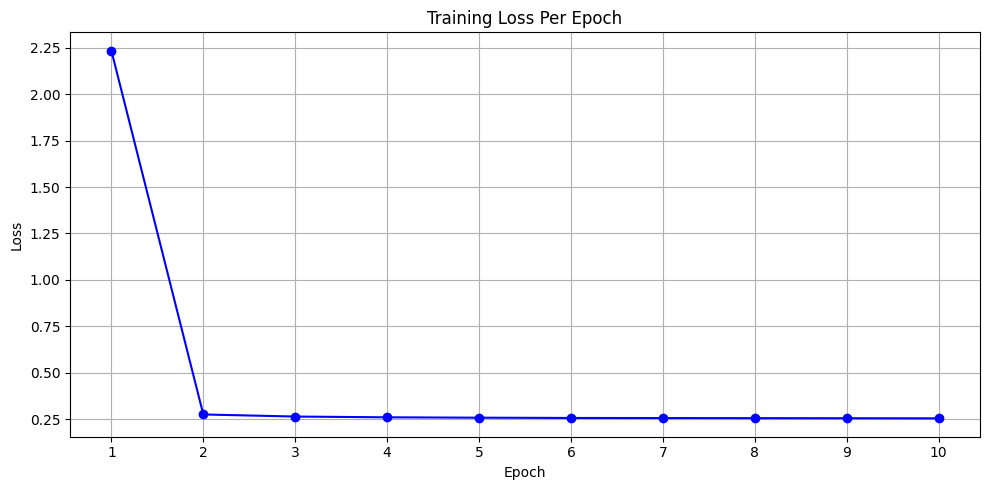

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-', color='blue')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(range(1, num_epochs + 1))
plt.tight_layout()
plt.show()

### 6.5 - Inference

Note that by inference, I mean similarity/dissimilarity of embeddings and not image classification.

In [14]:
import torch.nn.functional as F

In [17]:
def visualize_inference_pairs(img1, img2, distance):
    """Visualizes a pair of images and displays the distance between their embeddings.
    Args:
    - img1, img2: Tensors representing the image pair (C, H, W).
    - distance: The calculated distance between the embeddings of the image pair.
    """
    
    # Convert tensors to numpy for visualization
    img1 = img1.cpu().squeeze().numpy().transpose((1, 2, 0))
    img2 = img2.cpu().squeeze().numpy().transpose((1, 2, 0))

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)
    axes[0].set_title("Image 1")
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title("Image 2")
    axes[1].axis('off')

    plt.suptitle(f"Distance: {distance:.4f}", fontsize=16)
    plt.show()

In [18]:
def inference_and_visualize(model, img1, img2):
    """Performs inference on a pair of images and visualizes them with the distance.
    Args:
    - model: The trained Siamese Network model.
    - img1, img2: Tensors representing the image pair (1, C, H, W).
    """
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        img1, img2 = img1.to(device), img2.to(device)
        output1, output2 = model(img1, img2)
        distance = F.pairwise_distance(output1, output2)
        
    visualize_inference_pairs(img1[0], img2[0], distance.item())

In [15]:
def inference(img1, img2):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        img1, img2 = img1.to(device), img2.to(device)
        output1, output2 = model(img1, img2)
        distance = F.pairwise_distance(output1, output2)
        return distance.item()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


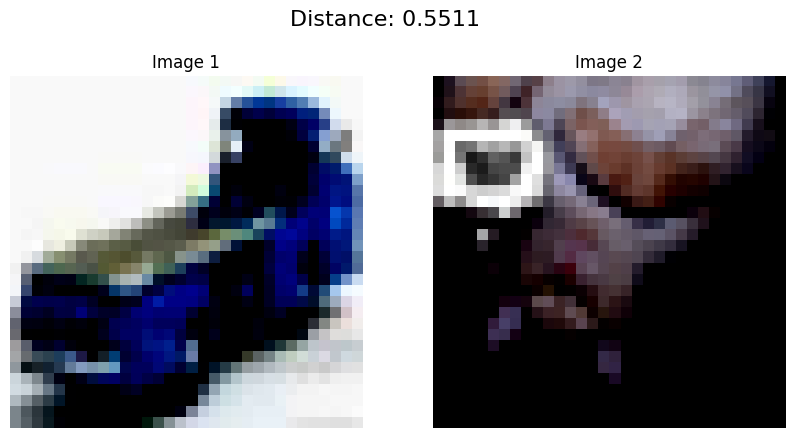

In [25]:
# Example usage with the first pair from the DataLoader
img1, img2, _ = next(iter(train_dataloader))
inference_and_visualize(model, img1[0:1], img2[0:1])

### 6.6 - Visualizing Embeddings with t-SNE

Visualize the learned embeddings using t-SNE to see how well the model distinguishes between classes.

In [41]:
import pandas as pd
import seaborn as sns

In [42]:
def visualize_embeddings(model, data_loader):
    model.eval()
    embeddings, labels = [], []

    with torch.no_grad():
        for img1, img2, label in data_loader:
            img1 = img1.to(device)
            # Forward pass to get embeddings. Only use img1 for simplicity.
            emb1, _ = model(img1, img1)  # We pass img1 as both inputs to get embeddings
            embeddings.append(emb1.cpu().numpy())  # Assuming we want to work with NumPy arrays
            labels.append(label.cpu().numpy())
    
    # Concatenate all batched embeddings and labels into single NumPy arrays
    embeddings = np.concatenate(embeddings, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    tsne = TSNE(n_components=2, random_state=0)
    embeddings_2d = tsne.fit_transform(embeddings)

    labels_squeezed = labels.squeeze()
    labels_series = pd.Series(labels_squeezed)
        
    sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=labels.squeeze(), palette="deep")
    plt.title('t-SNE of Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

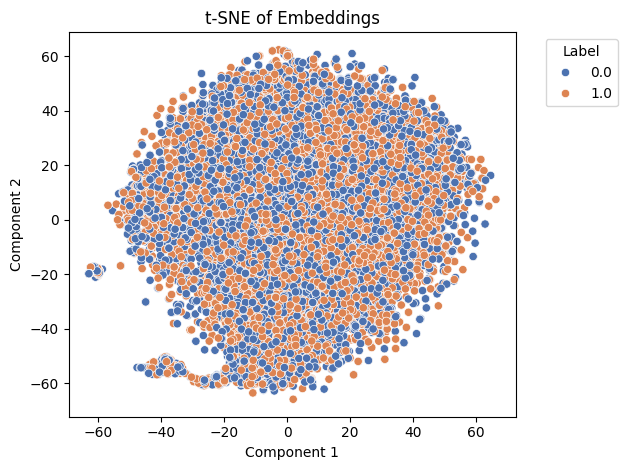

In [43]:
visualize_embeddings(model, test_dataloader)

#### Key Takeaways

- Contrastive learning is a self-supervised, task-independent deep learning technique that allows a model to learn about data, even without labels.
- The model learns general features about the dataset by learning which types of images are similar, and which ones are different.
- **SimCLRv2** is an example of a contrastive learning approach that learns how to represent images such that similar images have similar representations, thereby allowing the model to learn how to distinguish between images.

### References

1. https://towardsdatascience.com/understanding-contrastive-learning-d5b19fd96607
2. https://arxiv.org/pdf/2002.05709.pdf
3. https://towardsdatascience.com/a-framework-for-contrastive-self-supervised-learning-and-designing-a-new-approach-3caab5d29619
4. https://github.com/Lightning-AI/pytorch-lightning